In [6]:

from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image


Problem 4.1.1 :

In [8]:
def dft(input_img):
#     here we get the magnitude od our image 
    rows = input_img.shape[0]
    cols = input_img.shape[1]
    output_img = np.zeros((rows,cols),complex)
    for m in range(0,rows):
        for n in range(0,cols):
            for x in range(0,rows):
                for y in range(0,cols):
#                     this the DFT
                    output_img[m][n] += input_img[x][y] * np.exp(-1j*2*math.pi*(m*x/rows+n*y/cols))
    return output_img

In [9]:
input_image1 = np.array([[1/16 ,2/16 ,1/16 ] , [2/16 ,4/16 , 2/16] , [1/16 , 2/16 , 1/16]])
input_image2 = np.array([[-1, -1 , -1 ] , [-1 , 8 , -1 ] , [-1 , -1 , -1 ]])
input_image3 = np.array([[0 , -1 , 0] , [-1 , 5 , -1 ] , [0 , -1 , 0]])

freq1 = np.log(np.abs(dft(input_image1)))
freq2 = np.log(np.abs(dft(input_image2)))
freq3 = np.log(np.abs(dft(input_image3)))


C:\Users\Soroush\AppData\Local\Temp\ipykernel_13496\796653935.py:6: RuntimeWarning: divide by zero encountered in log
  freq2 = np.log(np.abs(dft(input_image2)))


In [10]:
print(freq1)
print(freq2)
print(freq3)

[[ 0.         -1.38629436 -1.38629436]
 [-1.38629436 -2.77258872 -2.77258872]
 [-1.38629436 -2.77258872 -2.77258872]]
[[      -inf 2.19722458 2.19722458]
 [2.19722458 2.19722458 2.19722458]
 [2.19722458 2.19722458 2.19722458]]
[[0.         1.38629436 1.38629436]
 [1.38629436 1.94591015 1.94591015]
 [1.38629436 1.94591015 1.94591015]]


Problem 4.1.2 :

In [11]:
def DFT_Magnitude(img) :
    Lana  = cv2.imread(img  , cv2.COLOR_BGR2GRAY)
    Lana = cv2.cvtColor(Lana, cv2.COLOR_BGR2GRAY)
    # at first we implement Lana with shift and logarithmoc
    Lana1 = Lana.copy()
    f = np.fft.fft2(Lana1)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum_Lana = 20*np.log(np.abs(fshift))
# here we implement DFT with shift and without log
    Lana2 = Lana.copy()
    f1 = np.fft.fft2(Lana2)
    fshift1 = np.fft.fftshift(f1)
    magnitude_spectrum_Lana1 = 20*(np.abs(fshift1))
# here we implement DFT without shift and with log
    Lana3 = Lana.copy()
    f2 = np.fft.fft2(Lana3)

    magnitude_spectrum_Lana2 = 20*np.log((np.abs(f2)))
# here we implement DFT without shift and without log
    Lana4 = Lana.copy()
    f3 = np.fft.fft2(Lana4)
    magnitude_spectrum_Lana3 = 20*(np.abs(f3))

    fig, ax = plt.subplots(1,4, figsize=(20 ,10))

    ax[0].imshow(magnitude_spectrum_Lana)
    ax[0].set_title("shift & logarithm")
    ax[1].imshow(magnitude_spectrum_Lana1)
    ax[1].set_title("shift")
    ax[2].imshow(magnitude_spectrum_Lana2)
    ax[2].set_title("log")
    ax[3].imshow(magnitude_spectrum_Lana3)
    ax[3].set_title("none of them")
    plt.show()

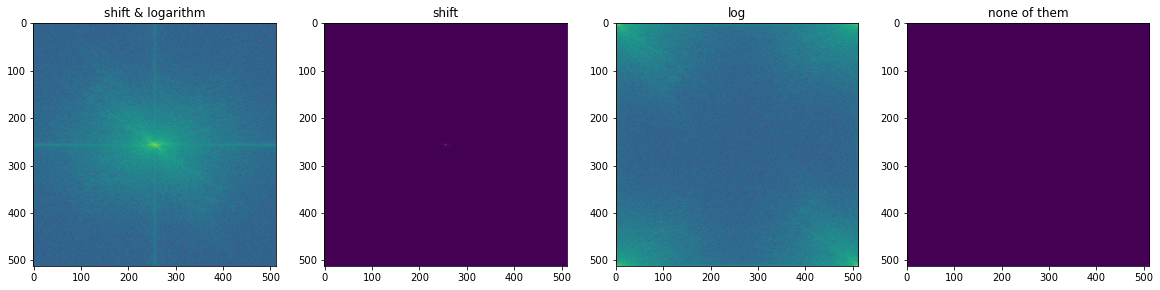

In [12]:
# hre we computhe thease for Lena picture
img = 'Lena.bmp'
DFT_Magnitude(img)

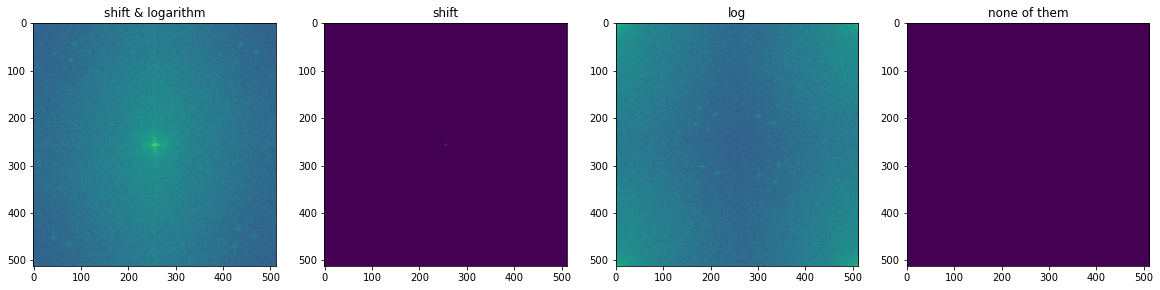

In [13]:
# hre we computhe thease for Baboon picture
img = 'Baboon.bmp'
DFT_Magnitude(img)

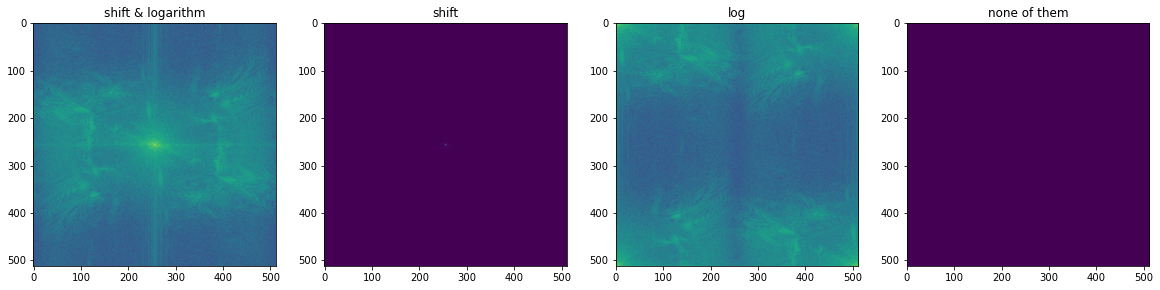

In [14]:
# hre we computhe thease for Barbara picture
img = 'Barbara.bmp'
DFT_Magnitude(img)

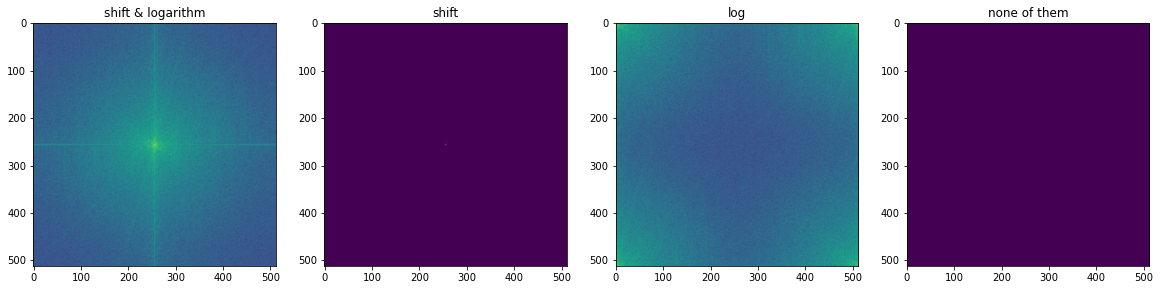

In [15]:
# hre we computhe thease for F16 picture
img = 'F16.bmp'
DFT_Magnitude(img)

Problem 4.2.2 :

Here we get the furier coefficient and trandfor our picture to furier space

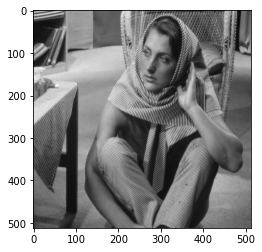

In [16]:
Barbara = cv2.imread("Barbara.bmp" , cv2.COLOR_BGR2GRAY )
Barbara = cv2.cvtColor(Barbara, cv2.COLOR_BGR2GRAY)
plt.imshow(Barbara , cmap=plt.cm.gray)

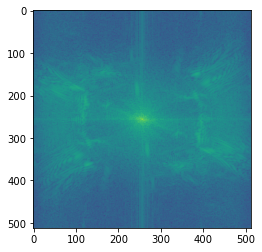

In [17]:
Barbara = cv2.imread("Barbara.bmp" , cv2.COLOR_BGR2GRAY )
Barbara = cv2.cvtColor(Barbara, cv2.COLOR_BGR2GRAY)
picture1 = Barbara.copy()
fn = np.fft.fft2(picture1)
fn = np.fft.fftshift(fn)
fn1= 20*np.log(np.abs(fn))
plt.imshow(fn1)

Here we implment a filter on the coefficients

In [32]:
# write the code 
# in this part x1 and x2 is the length of rediance of the circle that we want to equal them to zero
def filter_parta (fc , T ) :
    
    x1  = int(T*512)
    x2  = int((1-T)*512)
    mask = np.ones((512, 512))
    for i in range(x1 , x2 ):
        for j in range(x1 , x2):
            mask[i][j] = 0
 
    return fc*mask
def filter_partb(fc  , T) :
    x1 = int(512*T)
    mask = np.ones((512 , 512))
    # 0 ≤ {𝑘 𝑎𝑛𝑑 𝑙} ≤ 𝑇N
    x1 = int(512*1/8)
    for i in range(x1):
        for j in range(x1):
            mask[i][j]= 0
    # 0 <= 𝑘 <= 𝑇𝑁, 𝑎𝑛𝑑 (1 − 𝑇)𝑁 ≤ 𝑙 ≤ 𝑁 − 1
    for i in range(x1):
        for j in range(512-x1 , 511):
            mask[i][j] = 0
    #   (1 − 𝑇)𝑁 ≤ 𝑘 ≤ 𝑁 − 1 𝑎𝑛𝑑 0 ≤ {𝑙} ≤ 𝑇𝑁; 
    for i in range(512-x1  , 511) :
        for j in range(x1) :
            mask[i][j] = 0
    # (1 − 𝑇)𝑁 ≤ 𝑘 𝑎𝑛𝑑 𝑙 ≤ 𝑁 − 1
    for i in range(512 - x1 , 511) :
        for j in range(512 - x1 , 511):
            mask[i][j] = 0
    return fc*mask
    

Inverse Furier transform

In [34]:
def inverse_fourier_transform(fn):
    magnitude = np.abs(fn)
#     here we execute the filters on the coefficient of the magnitude and then inverse the furier
#     magnitude = filter_parta (magnitude ,1/4)
    magnitude = filter_partb (magnitude ,1/8)
    phase = np.angle(fn)
     
    real = np.cos(phase) * magnitude
    imag = np.sin(phase) * magnitude
    fft = real + (1j * imag)
    image = np.fft.ifft2(np.fft.ifftshift(fft))
    image = np.real(image)
    image = image.clip(min=0, max=255).astype('uint8')
    plt.imshow(image , cmap = plt.cm.gray)
     

Part a with T = 1 / 8

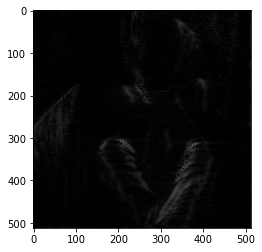

In [22]:
# plt.imshow(inverse_fourier_transform(fn1) , cmap=plt.cm.gray)
# 
inverse_fourier_transform(fn)

Part a with T = 1 / 4 :

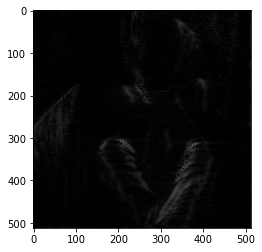

In [23]:
inverse_fourier_transform(fn)

Part B T = 1/4 :

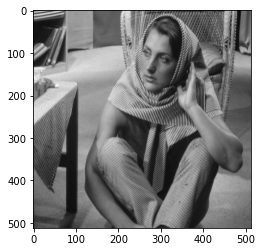

In [33]:
inverse_fourier_transform(fn)

Part B T = 1/8 :

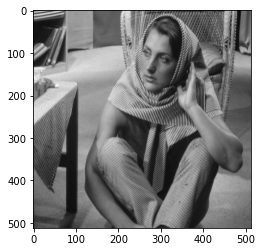

In [38]:
inverse_fourier_transform(fn)